                 Model  Accuracy  F1-Score   ROC-AUC
0  Logistic Regression  0.572940  0.546101  0.593312
1        Random Forest  0.571978  0.588666  0.593647
2              XGBoost  0.576188  0.509602  0.581894
3             CatBoost  0.575727  0.601277  0.600539
4                  MLP  0.576649  0.541476  0.601979
5             LightGBM  0.571778  0.588172  0.594891


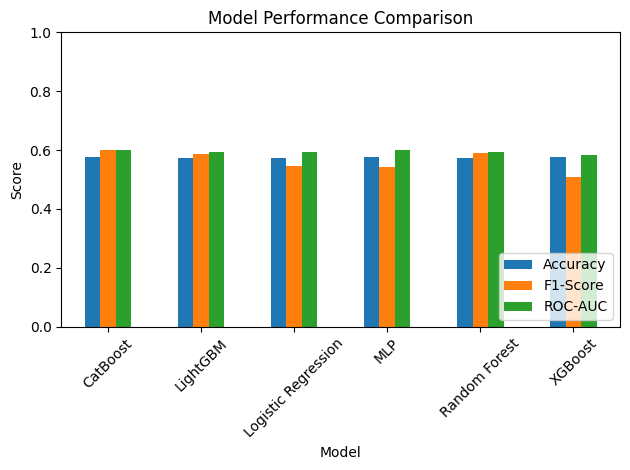

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect metrics for all models using your tuned test results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'CatBoost', 'MLP', 'LightGBM'],
    'Accuracy': [
        0.5729404690318701,  # Logistic Regression
        0.5719783523752255,  # Random Forest
        0.5761876127480458,  # XGBoost
        0.5757265985167368,  # CatBoost (replaces KNN)
        0.5766486269793546,  # MLP
        0.5717779114050912   # LightGBM
    ],
    'F1-Score': [
        0.5461014060502769,  # Logistic Regression
        0.5886658704780984,  # Random Forest
        0.5096020038964654,  # XGBoost
        0.6012771488311639,  # CatBoost (replaces KNN)
        0.5414758048759308,  # MLP
        0.5881717942786645   # LightGBM
    ],
    'ROC-AUC': [
        0.5933116564600067,  # Logistic Regression
        0.5936468537055324,  # Random Forest
        0.581893868655761,   # XGBoost
        0.6005392195562247,  # CatBoost (replaces KNN)
        0.6019793973681364,  # MLP
        0.5948906363291685   # LightGBM
    ]
}

# Create summary DataFrame
summary_df = pd.DataFrame(results)
print(summary_df)

# Bar chart: melt to long format for grouped plotting
summary_df_melted = summary_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
summary_df_melted.pivot(index='Model', columns='Metric', values='Score').plot(kind='bar')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [2]:
# Calculate a weighted score (here equal weight to all three metrics)
summary_df['Weighted_Score'] = summary_df[['Accuracy', 'F1-Score', 'ROC-AUC']].mean(axis=1)

# Find the model with the highest weighted score
best_model_overall = summary_df.loc[summary_df['Weighted_Score'].idxmax()]

print("Best Overall Model:")
print(f"Model: {best_model_overall['Model']}")
print(f"Accuracy: {best_model_overall['Accuracy']:.4f}")
print(f"F1-Score: {best_model_overall['F1-Score']:.4f}")
print(f"ROC-AUC: {best_model_overall['ROC-AUC']:.4f}")
print(f"Weighted Score: {best_model_overall['Weighted_Score']:.4f}")


Best Overall Model:
Model: CatBoost
Accuracy: 0.5757
F1-Score: 0.6013
ROC-AUC: 0.6005
Weighted Score: 0.5925
